In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [3]:
class Model:

    def __init__(self, k, b):
        ''' y = k * x + b
            y = f(x | k, b)
            function of x for given (k, b) values
        '''
        self.k = k
        self.b = b

    def set_params(self, k, b):
        self.k = k
        self.b = b

    def evaluate(self, x):
        return self.k * x + self.b


K_TRUE = 1.0   # [m/N]
B_TRUE = 4.0   # [m]
model_true = Model(k=K_TRUE, b=B_TRUE)

In [4]:
# y = k * x + b - Hooks law
# y - length of spring [m]
# k - Young modullus   [m/N]
# b - initial length of spring when no force is applied [m]
# x - force applied [N]

class Experiment:

    def __init__(self, model):
        self.model = model

    def run(self, x_min, x_max, num_x, file_name):
        # min force, max force, num of measurements
        x_list = np.linspace(x_min, x_max, num_x)
        y_list = []
        for x in x_list:
            y = self.model.evaluate(x)
            y_list.append(y)
        data = {
            'x': x_list,
            'y': y_list,
        }
        df = pd.DataFrame(data)
        df.to_csv(file_name, index=False)


experiment = Experiment(model=model_true)
experiment.run(
    x_min=0,
    x_max=10,
    num_x=11,
    file_name='results.csv'
)

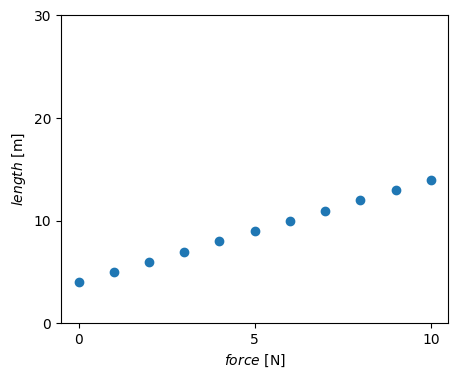

In [5]:
class Data:

    def __init__(self, file_name):
        self.df = pd.read_csv(file_name)

    def plot(self):
        plt.figure(figsize=(5, 4))   # size in inches
        plt.scatter(
            self.df.x,
            self.df.y,
        )
        plt.xlabel('$force$ [N]')
        plt.ylabel('$length$ [m]')
        plt.xticks([0, 5, 10])
        plt.yticks([0, 10, 20, 30])
        # TODO ticks inside and all sides
        plt.savefig('data.png', dpi=100)  # dots per inch


data = Data(file_name='results.csv')
data.plot()

In [6]:
# Thing that takes data and model and tries to
# fit model to data is called an optimizer.
# Optimizer takes control of model parameters
# and looks to minimize the difference between
# data and model - loss function.

In [7]:
# not even wrong

In [8]:
# Optimizers: by eye, grid seach, random walker, gradient descent

# Loss functions:
# Mean squared error

In [9]:
def mean_squared_error_loss(y_data, y_model):
    # y is length [m]
    # delta_y [m]
    # delta_y2 [m2]
    # delta_y_i = y_data_i - y_model_i
    # trick of numpy vectorization to perform ops on all elements in array
    delta_y = y_data - y_model
    delta_y2 = delta_y**2
    return np.mean(delta_y2)

100%|██████████| 100/100 [00:04<00:00, 24.88it/s]


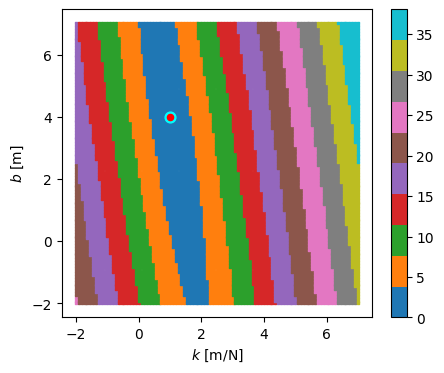

In [59]:
class GridSearchOptimizer:

    def __init__(self, data, model):
        self.data = data
        self.model = model
        self.k_list = []
        self.b_list = []
        self.loss_list = []
        self.idx_min = None

    def run(self, k_lim, b_lim, num_k, num_b):
        # optimizer will sample the model parameter space
        # with a regular grid of steps
        for k in tqdm.tqdm(np.linspace(k_lim[0], k_lim[1], num_k)):
            for b in np.linspace(b_lim[0], b_lim[1], num_b):
                self.model.set_params(k, b)
                y_model = self.model.evaluate(self.data.df.x)
                loss = mean_squared_error_loss(
                    y_data=self.data.df.y,
                    y_model=y_model
                )
                self.k_list.append(k)
                self.b_list.append(b)
                self.loss_list.append(loss)
        self.idx_min = np.argmin(self.loss_list)

    def plot(self):
        plt.figure(figsize=(5, 4))
        plt.scatter(
            self.k_list,
            self.b_list,
            c=np.sqrt(self.loss_list),
            cmap='tab10',
            s=2,
            marker='s',
            zorder=0
        )
        plt.colorbar()
        plt.scatter(
            self.k_list[self.idx_min],
            self.b_list[self.idx_min],
            s=20,
            c='r',
            zorder=2
        )
        plt.scatter(
            K_TRUE,
            B_TRUE,
            s=60,
            c='cyan',
            zorder=1
        )
        plt.xlabel('$k$ [m/N]')
        plt.ylabel('$b$ [m]')
        # TODO add label for mean squard error units of measurement [m2]
        plt.savefig('param_grid.png', dpi=100)


model_to_fit = Model(k=0, b=0)
optimizer = GridSearchOptimizer(data=data, model=model_to_fit)
optimizer.run(
    k_lim=(-2, 7),   # ~3
    b_lim=(-2, 7),
    num_k=100,
    num_b=100,
)
optimizer.plot()

Text(0, 0.5, 'number of sightings (counts) of cars passing per hour')

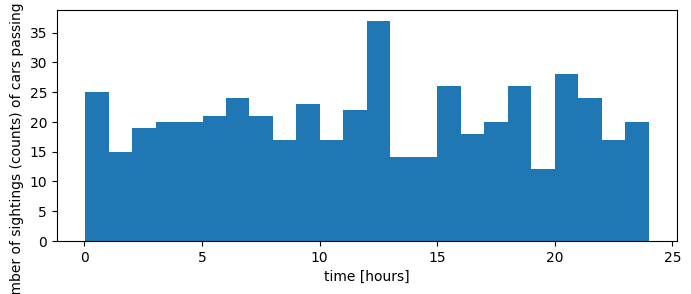

In [11]:
num_events = 500   # number of cars that pass in 24 hours (para = day + night)
num_bins = 24      # hourly basis
low_value = 0      # start at midnight
high_value = 24    # stop by midnight

num_cars_passing_by_per_hour = num_events / num_bins

# Assume that time for car to pass is independent of other cars
# We draw passage time as random variable from
# uniform distribution.
times_cars_passed_by = np.random.uniform(low=low_value, high=high_value, size=num_events)

# event - car passing by, photon passing by
plt.figure(figsize=(8, 3))
plt.hist(times_cars_passed_by, bins=num_bins)
plt.xlabel('time [hours]')
plt.ylabel('number of sightings (counts) of cars passing per hour')
# plt.axhline(average_counts_per_bin, c='r');

In [12]:
random_variables = []

random_variable = np.random.uniform(0, 1)
random_variable

for _ in range(10):
    random_variable = np.random.uniform(0, 1)
    random_variables.append(random_variable)

random_variables


[0.750155604621274,
 0.4955696023328222,
 0.1691968484250841,
 0.02635436554404824,
 0.21125735378311838,
 0.3028722542009499,
 0.5267436160401963,
 0.40108150710595325,
 0.6213392608857792,
 0.8286649432354989]

In [13]:
# coin: heads or tails
# coin can have two states: 0 or 1


outcomes = [0, 1]



toss = np.random.choice(outcomes)

num_tosses = 10
for iteration in range(num_tosses):
    toss = np.random.choice(outcomes)
    print(toss)


1
0
0
0
0
0
1
0
1
1


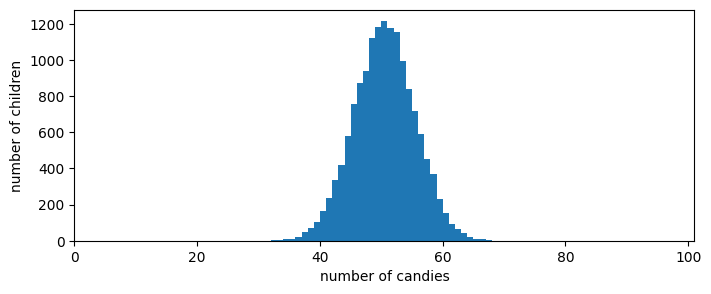

In [14]:
NUM_TOSSES = 100

def random_event():
    # person tosses coin for 10 times and outcome is sum of heads
    # total is expected to be between 0 and 10
    num_tosses = NUM_TOSSES
    total = 0
    for iteration in range(num_tosses):
        outcome = np.random.choice([0, 1])
        total += outcome
    return total

# random_event()


num_childer = 15000
# np.random.seed(1)

results = []
for child in range(num_childer):
    total = random_event()
    results.append(total)


# we expect to have a list of 15 numbers, their values will be
# between 0 and 10

results = np.array(results)
results

# results is list of result - childs "salary" is sweets.
# result i a random variable which has been obtained
# by summing up number of heads that appeared in 10 sequential
# coin tosses

plt.figure(figsize=(8, 3))
# plt.xlabel('number of cadies given per child after he/she performed and experiment')
# plt.ylabel('number of children that received number of candies');
plt.xlabel('number of candies')
plt.ylabel('number of children')
plt.xlim(0, NUM_TOSSES + 1)
out = plt.hist(results, bins=np.arange(0, NUM_TOSSES + 1))

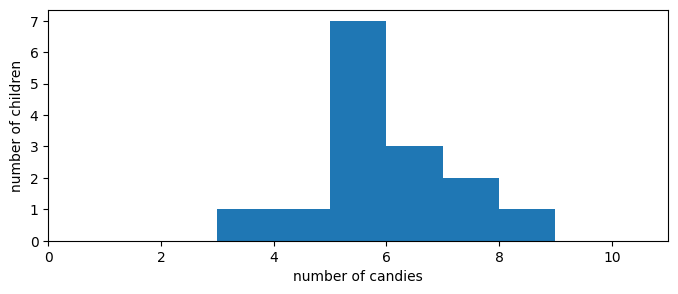

In [15]:
NUM_TOSSES = 10


def random_event():
    return np.random.choice([0, 1], NUM_TOSSES).sum()


num_childer = 15
np.random.seed(1)

results = []
for child in range(num_childer):
    total = random_event()
    results.append(total)


# we expect to have a list of 15 numbers, their values will be
# between 0 and 10

results = np.array(results)
results

# results is list of result - childs "salary" is sweets.
# result i a random variable which has been obtained
# by summing up number of heads that appeared in 10 sequential
# coin tosses

plt.figure(figsize=(8, 3))
# plt.xlabel('number of cadies given per child after he/she performed and experiment')
# plt.ylabel('number of children that received number of candies');
plt.xlabel('number of candies')
plt.ylabel('number of children')
plt.xlim(0, NUM_TOSSES + 1)
out = plt.hist(results, bins=np.arange(0, NUM_TOSSES + 1))


# TODO generate 2D matrix

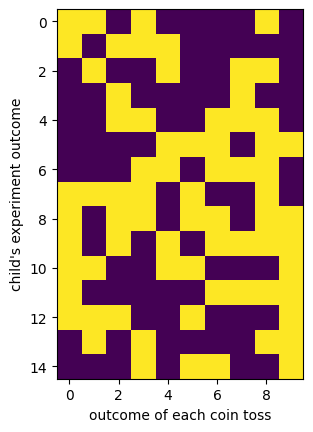

In [16]:
num_children = 15


RESULT = np.random.choice([0, 1], (num_children, NUM_TOSSES))

plt.imshow(RESULT)
plt.xlabel('outcome of each coin toss')
plt.ylabel("child's experiment outcome")


# row-wise summation gives number of sweets to be given per child


result = RESULT.sum(axis=1)


In [33]:
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * \
           np.exp(-(x - mu)**2 / (2 * sigma**2))


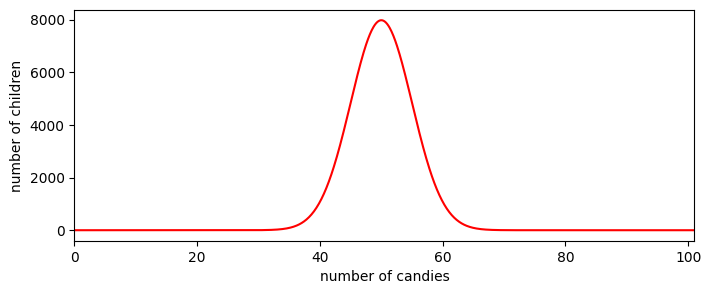

In [46]:
# final code

np.random.seed(1)
NUM_CHILDREN = 100000
NUM_TOSSES = 100
children_experiment_outcome = np.random.choice([0, 1], (NUM_CHILDREN, NUM_TOSSES))
number_of_candies_per_child = children_experiment_outcome.sum(axis=1)

plt.figure(figsize=(8, 3))
plt.xlabel('number of candies')
plt.ylabel('number of children')
plt.xlim(0, NUM_TOSSES + 1)
# plt.hist(number_of_candies_per_child, bins=np.arange(0, NUM_TOSSES + 1));
plt.yscale('linear')

x_gaussian = np.linspace(0, NUM_TOSSES + 1, 1000)
y_gaussian = gaussian(
    x_gaussian,
    mu=NUM_TOSSES / 2,
    sigma=5,   # ?
)
plt.plot(x_gaussian, 100e3 * y_gaussian, c='r');

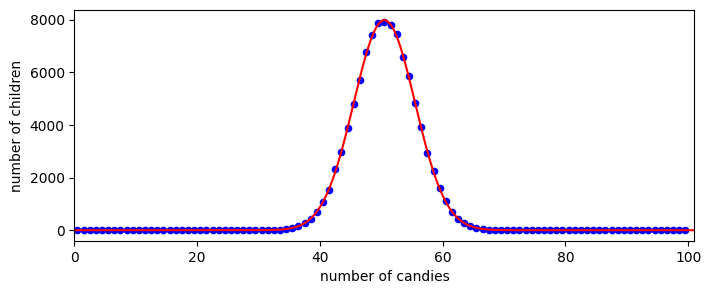

In [58]:
counts, bins = np.histogram(
    number_of_candies_per_child,
    bins=np.arange(0, NUM_TOSSES + 1)
)

centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(8, 3))
plt.xlabel('number of candies')
plt.ylabel('number of children')
plt.xlim(0, NUM_TOSSES + 1)
plt.scatter(centers, counts, s=20, c='b')
plt.yscale('linear')

x_gaussian = np.linspace(0, NUM_TOSSES + 1, 1000)
y_gaussian = gaussian(
    x_gaussian,
    mu=NUM_TOSSES / 2 + 0.5,
    sigma=5,   # ?
)
plt.plot(x_gaussian, 100e3 * y_gaussian, c='r');

# why 0.5 shift?
# why sigma = 5?

In [18]:
bins = np.arange(0, 12)
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [19]:
# type(out)
# len(out)
# len(out[0])
# out[0].sum()

len(out[1])
out[1]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [20]:
# for Puason distribution
# standard deviation = sqrt(mean)


# mean = 100
# sigma = sqrt(100) = 10

# S/N = mean / sigma = 100 / 10 = 10 = mean / sqrt(mean) = sqrt(mean)

# 1000; S/N ~30.

# 10,000, S/N = 10,000 / sqrt(10,000) = 100.

# ~65000

In [21]:
# CCD 16 bit, 0-65535

In [22]:
# 25-75% keep signal